In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("ecommerce_sales_data.csv")

In [6]:
data.head()

,Order Date,Product Name,Category,Region,Quantity,Sales,Profit
0,2024-12-31,Printer,Office,North,4,3640,348.93
1,2022-11-27,Mouse,Accessories,East,7,1197,106.53
2,2022-05-11,Tablet,Electronics,South,5,5865,502.73
3,2024-03-16,Mouse,Accessories,South,2,786,202.87
4,2022-09-10,Mouse,Accessories,West,1,509,103.28


Identifying the if the data contains null values or not

In [7]:
data.isnull().sum()

Order Date      0
Product Name    0
Category        0
Region          0
Quantity        0
Sales           0
Profit          0
dtype: int64

Identifying the if the data contains duplicate values or not

In [8]:
data.duplicated().sum()

np.int64(0)

Checking the Column Data type

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3500 non-null   object 
 1   Product Name  3500 non-null   object 
 2   Category      3500 non-null   object 
 3   Region        3500 non-null   object 
 4   Quantity      3500 non-null   int64  
 5   Sales         3500 non-null   int64  
 6   Profit        3500 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 191.5+ KB


Knowing the statistics of a Columns

In [10]:
data.describe()

,Quantity,Sales,Profit
count,3500.000000,3500.000000,3500.000000
mean,4.931714,3047.966000,527.047203
std,2.575895,2440.213237,504.139732
min,1.000000,51.000000,6.970000
25%,3.000000,1049.500000,158.695000
50%,5.000000,2350.500000,361.070000
75%,7.000000,4537.000000,729.125000
max,9.000000,10782.000000,2946.930000


In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

Data Cleaning and Feature Engineering

In [13]:
data["Order Date"] = pd.to_datetime(data["Order Date"])
data = data.sort_values(["Order Date"])

In [14]:
data["Month"] = data["Order Date"].dt.month

In [15]:
data["Year"] = data["Order Date"].dt.year

Business Insights 

In [19]:
top_products = (
    data.groupby('Product Name')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

In [25]:
print(f"The products of a e-commerce sales analaysis:",top_products)

The products of a e-commerce sales analaysis: Product Name
Camera        1177381
Monitor       1160048
Printer       1094216
Mouse         1074398
Smartphone    1069681
Smartwatch    1049211
Keyboard      1024507
Tablet        1023928
Laptop        1005873
Headphones     988638
Name: Sales, dtype: int64


In [26]:
category_profit = (
    data.groupby('Category')[['Sales', 'Profit']]
    .sum()
)

In [27]:
print(f"\nCategory-wise Sales & Profit:\n", category_profit)


Category-wise Sales & Profit:
                Sales     Profit
Category                       
Accessories  4247591  736084.74
Electronics  5326074  923185.59
Office       1094216  185394.88


Time Series (Monthly Sales)

In [28]:
monthly_sales = (
    data.set_index('Order Date').resample('M')['Sales'].sum()
)

C:\Users\Sriharshini\AppData\Local\Temp\ipykernel_13788\3482728270.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.set_index('Order Date').resample('M')['Sales'].sum()


In [29]:
monthly_sales

Order Date
2022-01-31    341544
2022-02-28    208775
2022-03-31    294660
2022-04-30    230624
2022-05-31    314295
2022-06-30    273851
2022-07-31    214627
2022-08-31    296242
2022-09-30    240211
2022-10-31    324989
2022-11-30    257111
2022-12-31    259041
2023-01-31    343256
2023-02-28    313931
2023-03-31    303391
2023-04-30    280808
2023-05-31    346481
2023-06-30    251686
2023-07-31    320798
2023-08-31    388428
2023-09-30    303409
2023-10-31    253145
2023-11-30    306195
2023-12-31    375064
2024-01-31    282814
2024-02-29    179708
2024-03-31    341563
2024-04-30    310444
2024-05-31    373911
2024-06-30    314268
2024-07-31    309515
2024-08-31    240269
2024-09-30    341926
2024-10-31    314135
2024-11-30    291769
2024-12-31    324997
Freq: ME, Name: Sales, dtype: int64

Trend Analysis

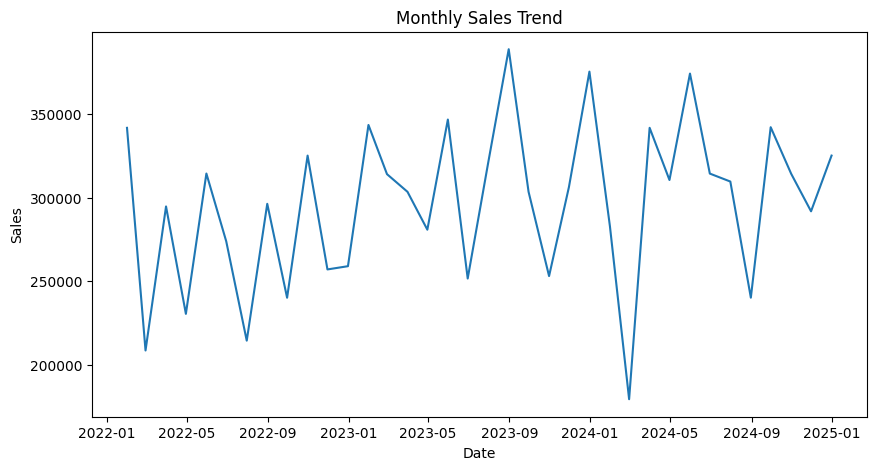

In [30]:

plt.figure(figsize=(10,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [32]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [33]:
yearly_sales = (
    data.set_index("Year").resample('Y')['Sales'].sum()
)

C:\Users\Sriharshini\AppData\Local\Temp\ipykernel_13788\951012915.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data.set_index("Year").resample('Y')['Sales'].sum()


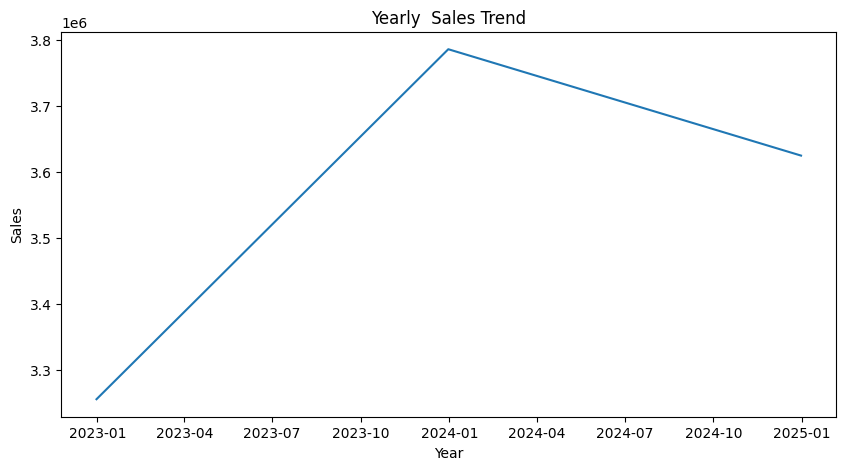

In [34]:

plt.figure(figsize=(10,5))
plt.plot(yearly_sales)
plt.title("Yearly  Sales Trend")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

STATIONARITY CHECK

In [35]:
adf_stat, p_value, *_ = adfuller(monthly_sales)

print("\nADF Statistic:", adf_stat)
print("p-value:", p_value)


ADF Statistic: -4.725263851845848
p-value: 7.542210477895912e-05


In [36]:
# Differencing for stability
sales_diff = monthly_sales.diff().dropna()

Train and test split 

In [37]:
train_size = int(len(sales_diff) * 0.8)
train = sales_diff.iloc[:train_size]
test = sales_diff.iloc[train_size:]

AR Model

In [40]:
ar_model = AutoReg(train, lags=2).fit()
ar_predictions = ar_model.predict(
    start=len(train),
    end=len(train) + len(test) - 1
)

In [ ]:
MOVING AVERAGE (MA) MODEL

In [39]:
ma_model = ARIMA(train, order=(0, 0, 2)).fit()
ma_predictions = ma_model.forecast(steps=len(test))

C:\Users\Sriharshini\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


MODEL EVALUATION

In [41]:
def evaluate_model(actual, predicted, model_name):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    print(f"{model_name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}")

evaluate_model(test, ar_predictions, "AR Model")
evaluate_model(test, ma_predictions, "MA Model")


AR Model → MAE: 45870.48, RMSE: 57180.83
MA Model → MAE: 42043.18, RMSE: 51091.48


Forecast Comparsion 

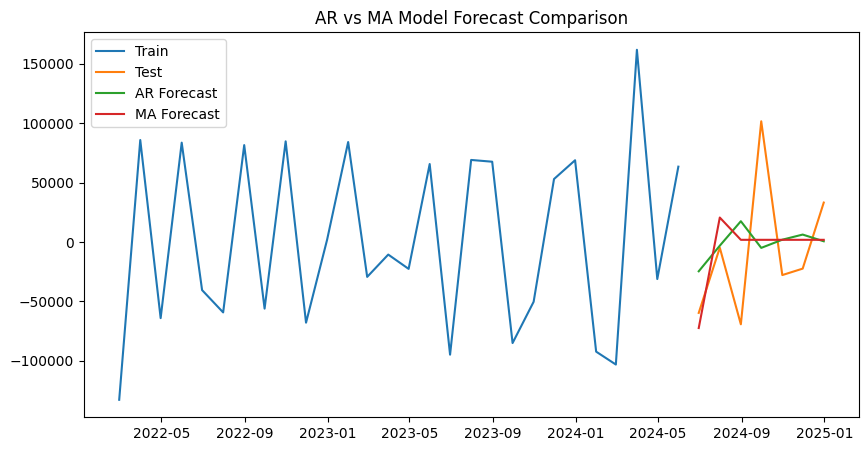

In [42]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_predictions, label='AR Forecast')
plt.plot(test.index, ma_predictions, label='MA Forecast')
plt.legend()
plt.title("AR vs MA Model Forecast Comparison")
plt.show()

In [ ]:
# Time plot
plt.figure(figsize=(7, 5))
plt.plot(train.index, test, marker='o', linestyle='-', markersize=5)
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.title('Monthly Sunspots Time Plot')
plt.grid(True)
plt.show()